In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from src import imread, fit_circle

In [2]:
def distort(img, x0, y0, r):
    assert img.ndim == 2

    yy, xx = np.indices(img.shape)

    rr = np.sqrt((xx - x0) ** 2 + (yy - y0) ** 2)
    rr = np.round(rr).astype(int)

    tt = np.arctan2(yy - y0, xx - x0)
    tt = (tt + np.pi) * 180 / np.pi
    tt = np.round(tt).astype(int)
    tt = np.mod(tt, 360)

    distorted_img = np.full((np.max(rr) + 1, 360), fill_value = np.nan)
    distorted_img[rr.tolist(), tt.tolist()] = img[yy.tolist(), xx.tolist()]
    distorted_img = distorted_img[:round(r)]
    return distorted_img

def fill_nan(img, method = 'cubic', nan_value = 0):
    assert img.ndim == 2

    nan_mask = np.isnan(img)
    valid_mask = ~nan_mask

    hh, ww = np.indices(img.shape)
    points = np.array([hh[valid_mask], ww[valid_mask]]).T
    nan_points = np.array([hh[nan_mask], ww[nan_mask]]).T
    values = img[valid_mask]

    interpolated_values = griddata(points, values, nan_points, method = method)
    img[nan_mask] = interpolated_values

    img = np.nan_to_num(img, nan = nan_value)
    return img

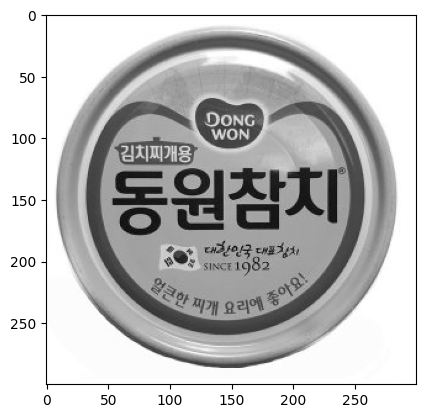

In [3]:
img = imread('data/sample5.jpg').convert('L')
img = np.array(img)

plt.imshow(img, cmap = 'gray')
plt.show()

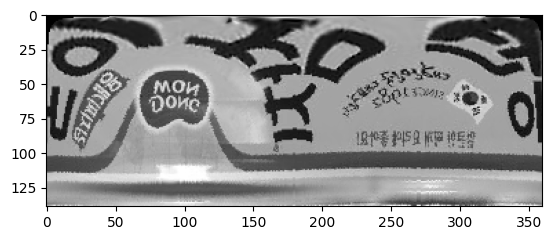

In [4]:
distorted_img = distort(img, *fit_circle(img))
distorted_img = fill_nan(distorted_img)

distorted_img = np.round(distorted_img)
distorted_img = np.clip(distorted_img, 0, 255)
distorted_img = distorted_img.astype(np.uint8)

plt.imshow(distorted_img, cmap = 'gray')
plt.show()